In [6]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [5]:
# pip install pandas

     ---------------------------------------- 10.6/10.6 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 503.5/503.5 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
# pip install matplotlib

In [7]:
# load the dataset
dataset = np.loadtxt('pima-indians-diabetes.data.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [8]:
input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [8]


In [9]:
model = keras.Sequential([
    layers.Dense(12, activation='relu', input_shape=input_shape),
    layers.Dense(8, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # 'mae'
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    X, y,
    #validation_data=(X_valid, y_valid),
    batch_size=10,
    epochs=150,
)

Epoch 1/150
77/77 [==============================] - 2s 2ms/step - loss: 0.9392 - accuracy: 0.5599
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7215 - accuracy: 0.6042
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.6315
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6315
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.6432
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.6602
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.6719
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.6784
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.6706
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6784
Epoch 11/

77/77 [==============================] - 0s 2ms/step - loss: 0.5182 - accuracy: 0.7383
Epoch 84/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.7383
Epoch 85/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7396
Epoch 86/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7565
Epoch 87/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.7500
Epoch 88/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.7617
Epoch 89/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.7578
Epoch 90/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.7539
Epoch 91/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7526
Epoch 92/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.7617
Epoch 93/150


Overfitting and Underfitting

In [12]:
# from tensorflow.keras import callbacks

# # define an early stopping callback
# early_stopping = callbacks.EarlyStopping(
#     min_delta=0.001, # minimium amount of change to count as an improvement
#     patience=5, # how many epochs to wait before stopping
#     restore_best_weights=True,
# )

# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_valid, y_valid),
#     batch_size=512,
#     epochs=50,
#     callbacks=[early_stopping]
# )

dropout

In [13]:
# # Add two 30% dropout layers, one after 128 and one after 64
# model = keras.Sequential([
#     layers.Dense(128, activation='relu', input_shape=input_shape),
#     layers.Dropout(0.3),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(1)
# ])

Batch Normalization

In [14]:
# # Add a BatchNormalization layer before each Dense layer
# model = keras.Sequential([
#     layers.BatchNormalization(),
#     layers.Dense(512, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dense(512, activation='relu', input_shape=input_shape),
#     layers.BatchNormalization(),
#     layers.Dense(512, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dense(1),
# ])

Evaluation

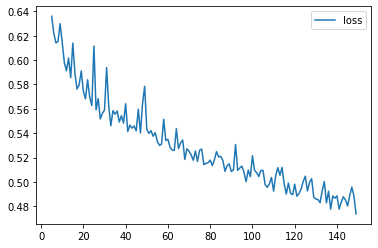

In [15]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

In [16]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.7839
Accuracy: 78.39


In [17]:
test = [[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0],
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0],
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0],
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0],
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0]]

test_y = [1, 0, 1, 0, 1]

predictions = model.predict(test)
# round predictions 
rounded = [round(x[0]) for x in predictions]
rounded

1/1 [==============================] - 0s 83ms/step


[1, 0, 1, 0, 1]